<a href="https://colab.research.google.com/github/Karla-Flores/Project-04/blob/main/Chicago_Crime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Preprocessing**

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
# from sklearn.linear_model import SGDClassifier
# import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Uploading ETL file
data = pd.read_csv('../Resources/chicago_crime_db.csv')
data.head(20)

,Primary Type,Arrest,Domestic,Latitude,Longitude,Location Description,HOUR,SEASON
0,BATTERY,False,True,41.815117,-87.670000,RESIDENCE,Afternoon,Autumn
1,THEFT,False,False,41.895080,-87.765400,CTA,Morning,Autumn
2,NARCOTICS,True,False,41.937406,-87.716650,PUBLIC OPEN SPACE,Afternoon,Autumn
3,ASSAULT,False,True,41.881903,-87.755121,RESIDENCE,Afternoon,Autumn
4,BURGLARY,False,False,41.744379,-87.658431,RESIDENCE,Morning,Autumn
5,BURGLARY,False,False,41.914636,-87.681631,RESIDENCE,Evening,Autumn
6,THEFT,True,False,41.851989,-87.689219,COMMERCIAL BUILDING,Afternoon,Autumn
7,ROBBERY,False,True,41.882814,-87.704326,PUBLIC OPEN SPACE,Morning,Autumn
8,THEFT,False,False,41.763648,-87.722345,PUBLIC OPEN SPACE,Afternoon,Autumn
9,BATTERY,False,False,41.975968,-87.768014,COMMERCIAL BUILDING,Morning,Autumn


In [3]:
data.shape

(6691918, 8)

In [15]:
data.loc[data['Primary Type'] == 'CRIMINAL DAMAGE', 'Primary Type'] = 'CRIMINAL LAW VIOLATION'
data.loc[data['Primary Type'] == 'CRIMINAL TRESPASS', 'Primary Type'] = 'CRIMINAL LAW VIOLATION'
data.loc[data['Primary Type'] == 'DECEPTIVE PRACTICE', 'Primary Type'] = 'CRIMINAL LAW VIOLATION'
data.loc[data['Primary Type'] == 'INTERFERENCE WITH PUBLIC OFFICER', 'Primary Type'] = 'CRIMINAL LAW VIOLATION'
data.loc[data['Primary Type'] == 'LIQUOR LAW VIOLATION', 'Primary Type'] = 'CRIMINAL LAW VIOLATION'
data.loc[data['Primary Type'] == 'PUBLIC PEACE VIOLATION', 'Primary Type'] = 'CRIMINAL LAW VIOLATION'
data.loc[data['Primary Type'] == 'WEAPONS VIOLATION', 'Primary Type'] = 'CRIMINAL LAW VIOLATION'
data.loc[data['Primary Type'] == 'GAMBLING', 'Primary Type'] = 'CRIMINAL LAW VIOLATION'

In [16]:
data.loc[data['Primary Type'] == 'OTHER OFFENSE', 'Primary Type'] = 'OTHER'

In [17]:
data.loc[data['Primary Type'] == 'BATTERY', 'Primary Type'] = 'ASSAULT'

In [18]:
data.loc[data['Primary Type'] == 'STALKING', 'Primary Type'] = 'INTIMIDATION'

In [19]:
data.loc[data['Primary Type'] == 'BURGLARY', 'Primary Type'] = 'ROBBERY'
data.loc[data['Primary Type'] == 'MOTOR VEHICLE THEFT', 'Primary Type'] = 'ROBBERY'
data.loc[data['Primary Type'] == 'THEFT', 'Primary Type'] = 'ROBBERY'

In [20]:
data.loc[data['Primary Type'] == 'CRIM SEXUAL ASSAULT', 'Primary Type'] = 'SEX OFFENSE'
data.loc[data['Primary Type'] == 'CRIMINAL SEXUAL ASSAUL', 'Primary Type'] = 'SEX OFFENSE'
data.loc[data['Primary Type'] == 'PROSTITUTION', 'Primary Type'] = 'SEX OFFENSE'

In [21]:
# Convert categorical data to numeric with `pd.get_dummies`
data_dummies = pd.get_dummies(data, columns = ['Location Description', 'HOUR', 'SEASON'],dtype=float)
data_dummies.head()

,Primary Type,Arrest,Domestic,Latitude,Longitude,Location Description_AIRPORT,Location Description_CHURCH,Location Description_COMMERCIAL BUILDING,Location Description_CTA,Location Description_EDUCATIONAL BUILDING,...,Location Description_RESIDENCE,Location Description_VEHICLE,HOUR_Afternoon,HOUR_Evening,HOUR_Morning,HOUR_Night,SEASON_Autumn,SEASON_Spring,SEASON_Summer,SEASON_Winter
0,ASSAULT,False,True,41.815117,-87.670000,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,ROBBERY,False,False,41.895080,-87.765400,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,NARCOTICS,True,False,41.937406,-87.716650,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,ASSAULT,False,True,41.881903,-87.755121,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,ROBBERY,False,False,41.744379,-87.658431,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [22]:
# Split our preprocessed data into our features and target arrays
y = data_dummies['Primary Type']
X = data_dummies.drop('Primary Type', axis=1)

In [23]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
list(le.classes_)
y_label = le.transform(y)
y_label

array([ 1, 10,  7, ...,  2, 10,  1])

In [24]:
len(y_label)

6691918

In [25]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y_label,random_state= 42)

In [26]:
# Standardizing dataset so columns that contain larger values do not unduly influence the outcome
scaler = StandardScaler().fit(X)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

In [27]:
# Train the Logistic Regression model on the scaled data and print the model score
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
print(f'Training Score: {round(model.score(X_train_scaled, y_train)*100,4)}%')
print(f'Testing Score: {round(model.score(X_test_scaled, y_test)*100,4)}%')

C:\Users\uldom\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Score: 53.0004%
Testing Score: 52.9825%


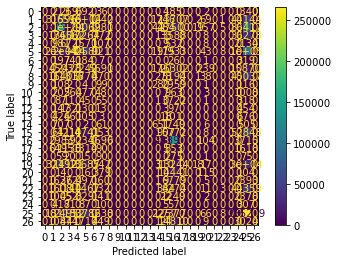

In [17]:
# Confusion Matrix Display
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# predictions = model.predict(X_test_scaled)
# cm = confusion_matrix(y_test, predictions, labels=model.classes_)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
# disp.plot()

# plt.show()

In [28]:
# Classification Report
from sklearn.metrics import classification_report
y_true = y_test
y_pred = model.predict(X_test)
print(classification_report(y_true, y_pred))

C:\Users\uldom\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2741
           1       0.00      0.00      0.00    415357
           2       0.00      0.00      0.00    353818
           3       0.00      0.00      0.00       808
           4       0.00      0.00      0.00      2764
           5       0.00      0.00      0.00      1931
           6       0.00      0.00      0.00      1393
           7       0.10      1.00      0.19    164795
           8       0.00      0.00      0.00     11513
           9       0.00      0.00      0.00    104654
          10       0.00      0.00      0.00    586044
          11       0.01      0.03      0.01     27162

    accuracy                           0.10   1672980
   macro avg       0.01      0.09      0.02   1672980
weighted avg       0.01      0.10      0.02   1672980



In [29]:
# Making Predictions
predictions = model.predict(X_test)
result_df=pd.DataFrame({"Prediction": predictions, "Crime": y_test})
result_df

,Prediction,Crime
0,7,9
1,7,1
2,7,2
3,7,9
4,7,10
...,...,...
1672975,7,7
1672976,7,2
1672977,7,7
1672978,7,10


In [30]:
result_df['Prediction'].value_counts()

7     1590472
11      82508
Name: Prediction, dtype: int64

In [31]:
le.inverse_transform([7, 11])

array(['NARCOTICS', 'SEX OFFENSE'], dtype=object)

In [32]:
result_df['Crime'].value_counts()

10    586044
1     415357
2     353818
7     164795
9     104654
11     27162
8      11513
4       2764
0       2741
5       1931
6       1393
3        808
Name: Crime, dtype: int64

In [33]:
comparison = np.where(result_df["Prediction"] == result_df["Crime"], True, False)
comparison =pd.DataFrame({"Prediction": predictions, "Crime": y_test, "Comparison": comparison})
comparison

,Prediction,Crime,Comparison
0,7,9,False
1,7,1,False
2,7,2,False
3,7,9,False
4,7,10,False
...,...,...,...
1672975,7,7,True
1672976,7,2,False
1672977,7,7,True
1672978,7,10,False


# Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
# Train the Random Forest classifier model on the scaled data and print the model score
model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=1, random_state=1)
model.fit(X_train_scaled, y_train)

print(f'Training Score: {round(model.score(X_train_scaled, y_train)*100,4)}%')
print(f'Testing Score: {round(model.score(X_test_scaled, y_test)*100,4)}%')

Training Score: 53.6234%
Testing Score: 53.5822%


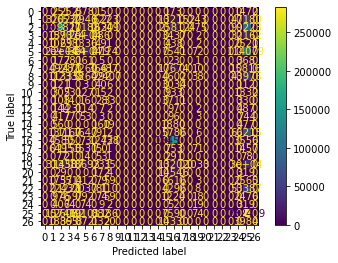

In [25]:
# Confusion Matrix Display
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# predictions = model.predict(X_test_scaled)
# cm = confusion_matrix(y_test, predictions, labels=model.classes_)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
# disp.plot()

# plt.show()

In [35]:
# Classification Report
from sklearn.metrics import classification_report
y_true = y_test
y_pred = model.predict(X_test)
print(classification_report(y_true, y_pred))

C:\Users\uldom\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2741
           1       0.00      0.00      0.00    415357
           2       0.26      0.09      0.13    353818
           3       0.00      0.00      0.00       808
           4       0.00      0.00      0.00      2764
           5       0.00      0.00      0.00      1931
           6       0.00      0.00      0.00      1393
           7       0.44      0.86      0.58    164795
           8       0.00      0.00      0.00     11513
           9       0.00      0.00      0.00    104654
          10       0.43      0.90      0.58    586044
          11       0.00      0.00      0.00     27162

    accuracy                           0.42   1672980
   macro avg       0.09      0.15      0.11   1672980
weighted avg       0.25      0.42      0.29   1672980

